In [1]:
import numpy as np
import pandas as pd
import akshare as ak
from matplotlib import pyplot as plt

import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from itertools import cycle
pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

np.random.seed(123)

In [2]:
input_path_dir= 'C:/ZhangLI/Codes/DataSet/kdd-cup/'
# input_path_dir= 'E:/Dataset/kdd/'
file_name= 'sdwpf_baidukddcup2022_full.csv'
ori_data = pd.read_csv(f'{input_path_dir}{file_name}')

In [3]:
def describe_train(train):
    print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
    print('-' * 50)
    # 查看哪些列具有缺失值
    print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')
    print(f'The train missing column: {train.columns[train.isna().any()].tolist()}.')
    for i in train.columns[train.isna().any()].tolist():
        print(f'The missing rate of \'{i}\' is {round((train[i].isna().sum() / train.shape[0])*100, 2)}%')
  
    # 查看数据值唯一的列
    one_value_cols = []
    one_value_cols += [col for col in train.columns if train[col].nunique() <= 1]

    print(f'There are {len(one_value_cols)} columns in train dataset with one unique value.')
    print(f'{one_value_cols} of unique values in the train set')
    print('-' * 50)
    # 查看数据缺失值情况
    nan_cols = [col for col in train.columns if train[col].isna().sum() / train.shape[0] > 0.90]
    print(f'There are {len(nan_cols)} columns in train dataset with [na value > 0.9].')
    print(f'The columns name is {nan_cols}')
    print('-' * 50)
    # 列类型
    numerical_col = list(train.select_dtypes(exclude=['object']).columns)
    category_col = list(filter(lambda x: x not in numerical_col,list(train.columns)))
    print(f'The numerical columns is: {numerical_col}')
    print(f'The category columns is: {category_col}')
    return one_value_cols + nan_cols
describe_train(ori_data)

Train dataset has 3550464 rows and 13 columns.
--------------------------------------------------
There are 10 columns in train dataset with missing values.
The train missing column: ['Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv'].
The missing rate of 'Wspd' is 1.26%
The missing rate of 'Wdir' is 1.26%
The missing rate of 'Etmp' is 1.26%
The missing rate of 'Itmp' is 1.26%
The missing rate of 'Ndir' is 1.26%
The missing rate of 'Pab1' is 1.26%
The missing rate of 'Pab2' is 1.26%
The missing rate of 'Pab3' is 1.26%
The missing rate of 'Prtv' is 1.26%
The missing rate of 'Patv' is 1.26%
There are 0 columns in train dataset with one unique value.
[] of unique values in the train set
--------------------------------------------------
There are 0 columns in train dataset with [na value > 0.9].
The columns name is []
--------------------------------------------------
The numerical columns is: ['TurbID', 'Day', 'Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', '

[]

In [4]:
ori_data

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,1,00:00,12.23,-0.83,29.08,41.90,-23.73,1.07,1.07,1.07,-0.21,1549.53
1,1,1,00:10,11.58,-3.32,29.01,42.01,-23.70,1.06,1.06,1.06,-0.25,1549.71
2,1,1,00:20,11.21,-1.38,29.17,42.24,-28.84,1.04,1.04,1.04,-0.25,1534.77
3,1,1,00:30,10.84,0.06,29.46,42.43,-31.39,1.03,1.03,1.03,-0.25,1508.20
4,1,1,00:40,11.03,2.03,29.82,42.77,-31.39,1.03,1.03,1.03,-66.01,1517.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550459,134,184,23:10,2.36,-74.19,7.30,11.70,238.59,90.39,90.37,90.36,-0.30,-0.30
3550460,134,184,23:20,1.72,-67.92,7.21,11.70,238.59,90.39,90.37,90.36,-0.30,-0.30
3550461,134,184,23:30,1.46,-59.15,7.10,11.70,238.59,90.39,90.37,90.36,-0.30,-0.30
3550462,134,184,23:40,1.31,-64.11,7.10,11.70,238.59,90.39,90.37,90.36,-0.30,-0.30


<AxesSubplot:title={'center':'Patv'}>

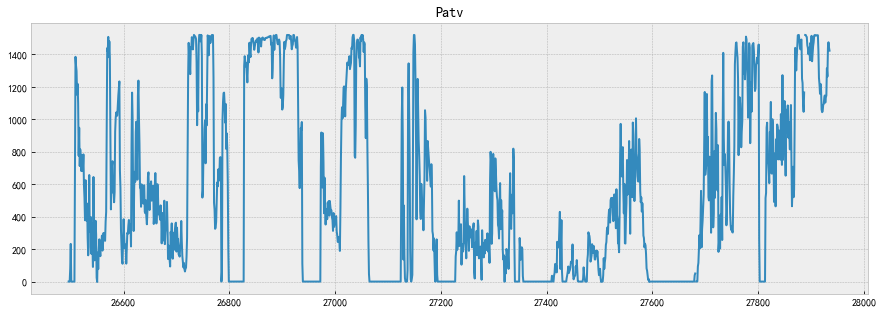

In [5]:
6*24*10
# ori_data[ori_data['TurbID'] == 1]['Patv'][0:6*24*10].plot(figsize=(15, 5), color=next(color_cycle), title='Patv')
ori_data[ori_data['TurbID'] == 2]['Patv'][0:6*24*10].plot(figsize=(15, 5), color=next(color_cycle), title='Patv')

从可视化上看，更像是随机序列
对于平稳性序列，自相关系数往往会迅速退化到0，      对于非平稳性序列，退化会发生得更慢，或存在先减后增或者周期性的波动等变动，      该自相关图下降的很慢，且pacf图只与第一项有关
The mean of data is: 949.16, The var of data is: 295458.37
The mean of data is: 396.74, The var of data is: 275137.44
The mean of data is: 832.87, The var of data is: 350653.26
The mean of data is: 679.65, The var of data is: 48707.14
The mean of data is: 347.2, The var of data is: 27683.33
从均值和方差上看，均值和方差波动较大，故是非平稳的
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.622
P-value                         0.089
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.88 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
原假设：存在单位根，非平稳序列        备选假设：不存在单位根，时间序列是平稳的-[不含截距项和趋势项平稳/含截距项平稳/含截距项和趋势平稳]      p=0.089>0.05，不拒绝原假设，非平稳
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.063
P-value              

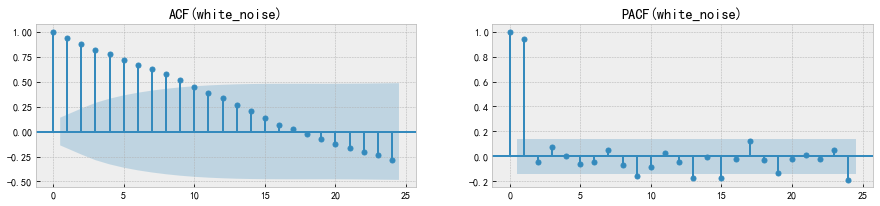

In [11]:
# 平稳性检验
# 1、可视化[看不出来]
print('从可视化上看，更像是随机序列')
# 2、ACF PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# subplots(1,2)使用ax[0] ax[1]  
# subplots(2,2)使用ax[0][0] ax[0][1]两位 
data = ori_data[ori_data['TurbID'] == 1]['Patv'][0:200]
fig, ax = plt.subplots(1, 2, figsize=(15,3))
fig.subplots_adjust(hspace=0.5)

plot_acf(data, ax=ax[0])
ax[0].set_title('ACF(white_noise)')
plot_pacf(data, ax=ax[1])
ax[1].set_title('PACF(white_noise)')
print('对于平稳性序列，自相关系数往往会迅速退化到0，\
      对于非平稳性序列，退化会发生得更慢，或存在先减后增或者周期性的波动等变动，\
      该自相关图下降的很慢，且pacf图只与第一项有关')
# 3、均值 方差
k = 5
n = int(len(data) / k)
for i in range(k):
    # print(data[n*i:n*(i+1)])
    avg = np.mean(data[i*n:n*(i+1)])
    var = np.var(data[i*n:n*(i+1)])
    print(f'The mean of data is: {round(avg,2)}, The var of data is: {round(var,2)}',)
print('从均值和方差上看，均值和方差波动较大，故是非平稳的')
# 4、单位根检验
# arch包中ADF检验可指定trend为
# 'n'（不含截距项和时间趋势项）
# 'c'（含截距项）
# 'ct'（含截距项和时间趋势项）
# 'ctt'（含截距项和时间趋势项和二次型时间趋势项）
# 分别对应不同平稳类型的检验。（滞后期lags默认为AIC最小）
# ---------------------------------------------------------------------------------------
import numpy as np
from arch.unitroot import ADF
adf = ADF(data)
print(adf.summary().as_text())
print('原假设：存在单位根，非平稳序列\
        备选假设：不存在单位根，时间序列是平稳的-[不含截距项和趋势项平稳/含截距项平稳/含截距项和趋势平稳]\
      p=0.089>0.05，不拒绝原假设，非平稳')
adf = ADF(data, trend='n')
print(adf.summary().as_text())
adf = ADF(data, trend='c')
print(adf.summary().as_text())
adf = ADF(data, trend='ct')
print(adf.summary().as_text())
adf = ADF(data, trend='ctt')
print(adf.summary().as_text())
print('原假设：存在单位根，非平稳序列\
        备选假设：不存在单位根，时间序列是平稳的-[不含截距项和趋势项平稳/含截距项平稳/含截距项和趋势平稳]\
      p=0.264>0.05，不拒绝原假设，非平稳')
# ---------------------------------------------------------------------------------------
from arch.unitroot import PhillipsPerron
pp = PhillipsPerron(data)
print(pp.summary().as_text())
print('原假设：存在单位根，非平稳序列\
        备选假设：不存在单位根，时间序列是平稳的-[不含截距项和趋势项平稳/含截距项平稳/含截距项和趋势平稳]\
      p=0.066>0.05，不拒绝原假设，非平稳')
pp = PhillipsPerron(data, trend = 'ct')
print(pp.summary().as_text())
print('原假设：存在单位根，非平稳序列\
        备选假设：不存在单位根，时间序列是平稳的-[不含截距项和趋势项平稳/含截距项平稳/含截距项和趋势平稳]\
      p= 0.194>0.05，不拒绝原假设，非平稳')
# ---------------------------------------------------------------------------------------
from arch.unitroot import DFGLS
dfgls = DFGLS(data)
print(dfgls.summary().as_text())

# 不指定trend情况下不能拒绝原假设，非平稳；指定trend='ct'时p值小于0.05，拒绝原假设，带截距项和时间趋势平稳。
dfgls = DFGLS(data, trend = 'ct')
print(dfgls.summary().as_text())

# ---------------------------------------------------------------------------------------
from arch.unitroot import KPSS
kpss = KPSS(data)
print(kpss.summary().as_text())

kpss = KPSS(data, trend = 'ct')
print(kpss.summary().as_text())
print('原假设：序列不存在单位根（时间序列是平稳的或趋势平稳的）\
    备择假设：序列存在单位根（时间序列是非平稳的）\
    p=0.134>0.05 不能拒绝原假设，序列平稳')

In [20]:
data

0        1549.53
1        1549.71
2        1534.77
3        1508.20
4        1517.76
          ...   
26491      -0.30
26492      -0.30
26493      -0.30
26494      -0.30
26495      -0.30
Name: Patv, Length: 26496, dtype: float64

In [16]:
# 白噪声检验
print('具有零均值同方差的独立同分布的序列为白噪声')
print('白噪声完全无自相关性，除0阶自相关系数为1外，理想情况下，延迟k阶的样本自相关系数均为0。\
      实际上由于样本序列的有限性，延迟k阶自相关系数并不完全为0，只要在0值附近即认为无自相关性。')
# 1.检验方法
# 2.1 Box-Pierce检验
from statsmodels.stats.diagnostic import acorr_ljungbox
res = acorr_ljungbox(data, lags=24, boxpierce=True, return_df=True) 
print(res)
print(' p值大于显著性水平（如0.05），不能拒绝原假设，可认为序列为白噪声序列；\
    p值小于显著性水平（如0.05），拒绝原假设，认为至少存在某一阶数的自相关，序列非白噪声\
      各延迟阶数下的p值均小于0.05，可以拒绝原假设，序列非白噪声')
# 2.2 Ljung-Box检验
# LB统计量小于选定置信水平下的临界值，或者p值大于显著性水平（如0.05），不能拒绝原假设，序列为白噪声
# LB统计量大于选定置信水平下的临界值，或者p值小于显著性水平（如0.05），拒绝原假设，序列非白噪声
from statsmodels.stats.diagnostic import acorr_ljungbox
res = acorr_ljungbox(data, lags=[6,12,24], return_df=True)
print(res)
print('LB统计量小于选定置信水平下的临界值，或者p值大于显著性水平（如0.05），不能拒绝原假设，序列为白噪声 \
    LB统计量大于选定置信水平下的临界值，或者p值小于显著性水平（如0.05），拒绝原假设，序列非白噪声 \
    各延迟阶数下的p值均小于0.05，可以拒绝原假设，序列非白噪声')

具有零均值同方差的独立同分布的序列为白噪声
白噪声完全无自相关性，除0阶自相关系数为1外，理想情况下，延迟k阶的样本自相关系数均为0。      实际上由于样本序列的有限性，延迟k阶自相关系数并不完全为0，只要在0值附近即认为无自相关性。
        lb_stat      lb_pvalue      bp_stat      bp_pvalue
1    178.001600   1.323626e-40   175.358012   5.000652e-40
2    333.030172   4.824108e-73   327.316711   8.396132e-72
3    470.948180  9.424276e-102   461.820907  8.953203e-100
4    594.123566  2.897432e-127   581.337618  1.694456e-124
5    701.817853  1.987011e-149   685.299925  7.405456e-146
6    794.341092  2.571192e-168   774.158877  5.893182e-164
7    875.366642  1.000817e-184   851.574378  1.370661e-179
8    944.794401  1.224713e-198   917.565119  9.178642e-193
9   1000.197899  1.562721e-209   969.951595  5.190417e-203
10  1042.205081  1.509607e-217  1009.463301  1.711232e-210
11  1074.580732  1.692344e-223  1039.755371  5.326682e-216
12  1098.870463  1.017830e-227  1062.361654  7.281622e-220
13  1114.361628  4.650578e-230  1076.702486  5.795879e-222
14  1123.403444  5.016483e-231  1085.028118  8.771870e